<a href="https://colab.research.google.com/github/Tonaram/Pet-Image-Classification-ML/blob/main/Solution_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/tutorial 1/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/tutorial 1/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/tutorial 1/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/tutorial 1/labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


1095


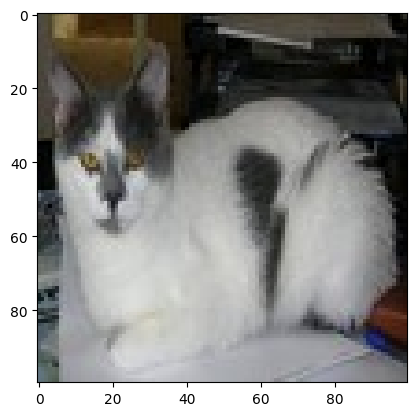

In [ ]:
idx = random.randint(0, len(X_train))
print(idx)
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 64)

Epoch 1/100
32/32 [==============================] - 27s 816ms/step - loss: 0.6818 - accuracy: 0.5460
Epoch 2/100
32/32 [==============================] - 26s 824ms/step - loss: 0.6174 - accuracy: 0.6630
Epoch 3/100
32/32 [==============================] - 24s 760ms/step - loss: 0.5561 - accuracy: 0.7195
Epoch 4/100
32/32 [==============================] - 28s 866ms/step - loss: 0.4767 - accuracy: 0.7785
Epoch 5/100
32/32 [==============================] - 27s 834ms/step - loss: 0.4484 - accuracy: 0.7890
Epoch 6/100
32/32 [==============================] - 27s 842ms/step - loss: 0.3886 - accuracy: 0.8285
Epoch 7/100
32/32 [==============================] - 24s 764ms/step - loss: 0.3397 - accuracy: 0.8510
Epoch 8/100
32/32 [==============================] - 27s 821ms/step - loss: 0.2793 - accuracy: 0.8855
Epoch 9/100
32/32 [==============================] - 29s 899ms/step - loss: 0.2578 - accuracy: 0.8960
Epoch 10/100
32/32 [==============================] - 27s 837ms/step - loss: 0.191

In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 2s 156ms/step - loss: 1.9446 - accuracy: 0.7125


[1.9445730447769165, 0.7124999761581421]

# Making predictions

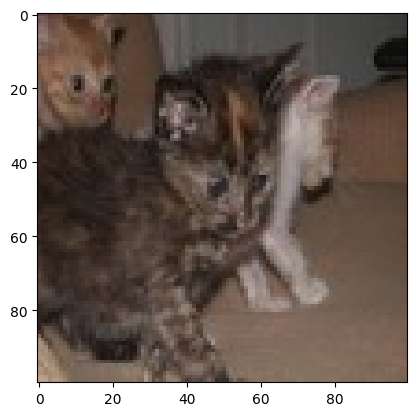

1/1 [==============================] - 0s 41ms/step
Our model says it is a : cat


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)